<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<b>Trans-Neptunian Objects (TNOs)</b> <br>
Contact author(s): Andrés A. Plazas Malagón<br>
Last verified to run: 07/10/2023 <br>
LSST Science Pipelines version: w_2023_27  <br>
Container Size: medium <br>
Targeted learning level: beginner <br>

**Description:** This tutorial studies the Trans-Neptunian Objects populations in DP0.3 

**Skills:** Use of the DP0.3 catalogs to study TNO populations.

**LSST Data Products:**  Catalogs:

**Packages:** lsst.afw.image, lsst.afw.detection, lsst.rsp, lsst.daf.butler, lsst.geom, lsst.afw.display, lsst.analysis.tools, lsst.pipe.base

**Credits:** Developed by Andrés A. Plazas Malagón in collaboration with Melissa Graham and the Rubin Community Science Team for DP0.2. This tutorial is based on a Jupyter Notebook by Pedro Bernardinelli. 

This notebook has made used of suggestions in the [Accessible Authoring Checklist](https://iota-school.github.io/accessibility_hackathon/hack#checklist)

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0-2.lsst.io">dp0-2.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

# Trans-Neptunian Objects in DP0.3

## Table of contents

## 1. Introduction

A trans-Neptunian object (TNO) is categorized as a minor planet within the Solar System. It orbits the Sun at an average distance greater than that of Neptune, which possesses a semi-major axis measuring approximately 30.1 astronomical units (au).

#### Additional resources

### 1.1. Package Imports

The [matplotlib](https://matplotlib.org/) (and especially sublibrary `matplotlib.pyplot`), [numpy](http://www.numpy.org/), [scipy](https://scipy.org/https://scipy.org/), and [astropy](http://www.astropy.org/) libraries are widely used Python libraries for plotting, scientific computing, scientific analysis, and astronomical data analysis.

The `lsst.rsp` package provides access to the Table Access Protocol (TAP) service for queries to the DP0 catalogs.

The `lsst.afw.image` provide visualization tools.

The `lsst.afw.display` library provides access to image visualization routines and the `lsst.daf.butler` library is used to access data products via the butler.

The `lsst.afw.analysis.tools` library provides acces to analysis tools.

The `lsst.geom` library provides the representation of a 2D coordinate `Point2D`.

The `lsst.pipe.base` library provides access to the `lsst.pipe.base.Struct` container.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import matplotlib.colors as mcolors
from matplotlib import colormaps
from cycler import cycler
from matplotlib.patches import Polygon

from lsst.rsp import get_tap_service, retrieve_query

In [19]:
### 1.2 Functions and Pareameters Definitions

In [20]:
#  Estimate a SS body's diameter (very roughly!) in km
#  from its solar system absolute magnitude, H, and albedo, a:
def estDiamFromHandAlbedo(H, albedo=0.15):
    estDiam = np.power(10., 3.1236 - 0.5*np.log10(albedo) - 0.2*H)
    return estDiam

In [21]:
# Gradient code copied from 
# https://stackoverflow.com/questions/29321835/is-it-possible-to-get-color-gradients-under-curve-in-matplotlib

def gradient_fill(x, y, alpha=1, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = plt.gca()

    line, = ax.plot(x, y, alpha=0, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    #alpha = line.get_alpha()
    #alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='upper', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmin, ymin], xy, [xmax, ymin], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    #ax.autoscale(True)
    return line, im

def gradient_fill_inv(x, y, alpha=1, fill_color=None, ax=None, **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.

    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    ax : a matplotlib Axes instance
        The axes to plot on. If None, the current pyplot axes will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.

    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    if ax is None:
        ax = pl.gca()

    line, = ax.plot(x, y, alpha=0, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    #alpha = line.get_alpha()
    #alpha = 1.0 if alpha is None else alpha

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb
    z[:,:,-1] = np.linspace(0, alpha, 100)[:,None]

    xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='upper', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.vstack([[xmax, ymax], xy, [xmin, ymax], [xmin, ymin]])
    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    #ax.autoscale(True)
    return line, im

In [22]:
def plot_resonances(ax, k, k_N, y_loc=None, a_shift=0.75, alpha=0.2):
    #from orbit_analysis import a_neptune as a_N
    a_N = 30.11
    a_res = a_N * np.cbrt(float(k)**2/float(k_N)**2)
    print (k, k_N, a_res)
    ax.axvline(a_res, linewidth=2, alpha=alpha, linestyle='--')
    if y_loc is not None:
        ax.annotate(r'${}:{}$'.format(k, k_N),
                    (a_res + a_shift, y_loc), rotation=90, fontsize=16)
    return ax

In [23]:
a_N = 30.1 



In [24]:
%load_ext pycodestyle_magic
%flake8_on
import logging
logging.getLogger("flake8").setLevel(logging.FATAL)

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [25]:
plt.style.use('tableau-colorblind10')

In [26]:
params = {'lines.linewidth': 2,
          'lines.linestyle': '-',
          'lines.color': 'black',
          # sets, among other things, the linewidth in a histogram
          'patch.linewidth': 2,
          # fonts & text
          'font.family': 'serif',
          'font.weight': 'medium',
          'font.size': 14.0,
          'text.color': 'black',
          # 'text.usetex': False,
          # 'text.latex.preamble': '\usepackage{amsmath}',
          # axes & ticks
          'axes.edgecolor': 'black',
          'axes.linewidth': 2.0,
          'axes.grid': False,
          'axes.titlesize': 'xx-large',
          'axes.labelsize': 'xx-large',
          'axes.labelweight': 'medium',
          'axes.labelcolor': 'black',
          'axes.formatter.limits': (-4, 4),
          'xtick.major.size': 10,
          'xtick.minor.size': 5,
          'xtick.major.pad': 8,
          'xtick.minor.pad': 8,
          'xtick.labelsize': 'xx-large',
          'xtick.minor.width': 2.0,
          'xtick.major.width': 2.0,
          'xtick.minor.visible': True,
          'ytick.major.size': 10,
          'ytick.minor.size': 5,
          'ytick.major.pad': 8,
          'ytick.minor.pad': 8,
          'ytick.labelsize': 'xx-large',
          'ytick.minor.width': 1.0,
          'ytick.major.width': 1.0,
          'ytick.minor.visible': True,
          'axes.prop_cycle': cycler('color',
                                    ['xkcd:cerulean blue', 'xkcd:scarlet',
                                     'xkcd:grass green',
                                     'xkcd:light orange',
                                     'xkcd:lighter purple',
                                     'xkcd:bright aqua', 'xkcd:dirt brown',
                                     'xkcd:gunmetal',
                                     'xkcd:dark hot pink',
                                     'xkcd:very dark brown']),
          # legends
          'legend.numpoints': 1,
          'legend.fontsize': 'x-large',
          'legend.shadow': False,
          'legend.frameon': True,
          'legend.fancybox': True,
          # figure
          'figure.titlesize': 'xx-large',
          'figure.figsize': (8, 6),
          'figure.facecolor': 'white'}
plt.rcParams.update(params)

Let's get the TAP service. Notice how it is a different service form the DP0.2 simulations. 

In [27]:
service = get_tap_service("ssotap")

In this tutorial, we'll use the Minor Planet Center orbital Elements DP0.3 catalog, 'dp03_catalogs.MPCORB'. We'll start by looking at the contents of this catalog, including the columns descriptions. 

In [28]:
results = service.search("SELECT column_name, datatype, description, "
                         "unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.MPCORB'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,"MPCORB: Arc (days), for single-opposition objects",d
1,arcEnd,char,MPCORB: Year of last observation (for multi-op...,
2,arcStart,char,MPCORB: Year of first observation (for multi-o...,
3,computer,char,MPCORB: Computer name,
4,e,double,MPCORB: Orbital eccentricity,
5,epoch,double,"MPCORB: Epoch (in MJD, .0 TT)",d
6,flags,int,MPCORB: 4-hexdigit flags. See https://minorpla...,
7,fullDesignation,char,MPCORB: Readable designation,
8,incl,double,"MPCORB: Inclination to the ecliptic, J2000.0 (...",deg
9,lastIncludedObservation,float,MPCORB: Date of last observation included in o...,d


We'll now request the object ID, the orbital elements, and the solar system magnitude, which is aproxy for size. 

Omega = Longitude of the ascending node = "node" (deg)

omega = Argument of periapsis, in this case, perihelion = "peri" (deg)

The following query can take at least 5 minutes. 

Known warning: "astropy WARNING: UnitsWarning: Unit 'degrees' not supported by the VOUnit standard. "


TNOs can be defined as having `a > 30`. There's no `a` column in the MPCORB table, so we will only use the second cut on the perihelion for now, when doing the TAP query. This will speed things greatly---reducing the query time from several minutes to seconds---as the number of rows is reduced from about 14.6 million to 60000.

In [32]:
#tnos_first_cut = service.search("SELECT ssObjectId,e,incl,mpcH,q,node,peri "
#                                "FROM dp03_catalogs.MPCORB "
#                                "WHERE q > 20").to_table()

n_obs = 50
tnos = service.search("SELECT mpc.ssObjectId, mpc.e, mpc.incl, mpc.mpcH, mpc.q, mpc.node, mpc.peri "
                                "FROM dp03_catalogs.MPCORB as mpc "
                                "JOIN dp03_catalogs.SSObject as sso "
                                "ON mpc.ssObjectId = sso.ssObjectId "
                                f"WHERE (mpc.q/(1-mpc.e) > {a_N}) "
                                f"AND sso.numObs > {n_obs}"
                                "AND mpc.e < 1").to_table()

In [33]:
print(len(tnos))

36007


Let's define the semi-major axis `a`, as a function of the eccentricity `e` and perihelion distance `q`, and attach it as a new column in the retrieved table.

In [35]:
a = tnos['q']/(1.0-tnos['e'])
tnos['a'] = a

We are now ready to perform the additional cut on `a` (`a` > 30 AU) that will help us define the Tran-Neptunian Objects (TNOs) popuplation as a subset of the initial catalog. 

In [59]:
#mask_tnos = (a > 30)
#tnos = tnos_first_cut[mask_tnos]

In [60]:
len(tnos)

57158

For solar system objects, particularly asteroids, the absolute magnitude is often referred to as the "H magnitude." It is defined as the apparent magnitude of the object when it is located at a distance of 1 astronomical unit (AU) from both the Sun and the observer. The H magnitude is specifically used for objects that primarily reflect sunlight, such as asteroids, since their brightness depends on their distance from the Sun and the observer.

The H magnitude allows astronomers to compare the intrinsic brightness of solar system objects, regardless of their varying distances from the Sun and Earth. It provides a standardized way to assess the object's true brightness and, therefore, its size or reflectivity.

The H magnitude is often used in conjunction with the G magnitude, which represents the slope of the object's brightness versus phase angle curve. By combining the H and G magnitudes, astronomers can gain insights into the surface properties and composition of asteroids.

It's worth noting that the H magnitude is not directly related to the physical size of the object. Instead, it provides information about the object's reflectivity and how much sunlight it reflects back into space. Determining the size of a solar system object typically requires additional measurements, such as radar observations or studying its shadow during occultations.

Text(0.5, 1.0, "TNO's size histogram from H \n albedo: 0.2")

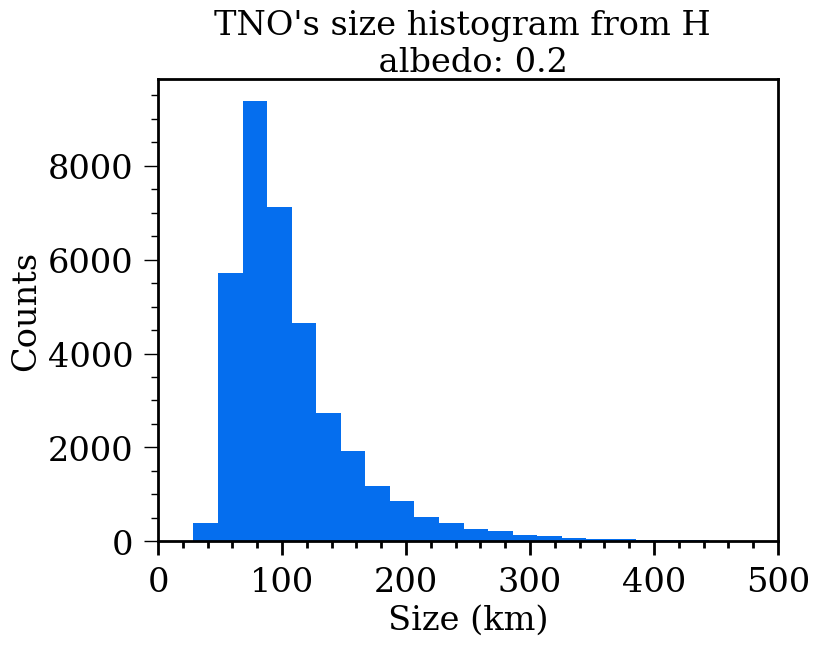

In [34]:
albedo = 0.2
sizes_tnos = estDiamFromHandAlbedo(tnos['mpcH'], albedo=albedo)

n_bins = 100
fig, axs = plt.subplots(1, 1)
axs.hist(sizes_tnos, bins=n_bins)
plt.xlim([0, 500])
plt.xlabel('Size (km)')
plt.ylabel('Counts')
plt.title(f"TNO's size histogram from H \n albedo: {albedo}")

Let's define some loose cuts to clasify the TNOs in dynamical classes (scattering, detached, classical, extreme). More robust dynamical classification can be found in Bernardinelli+2020(?) using orbital fits 

In [63]:
mask_classical = (tnos['a'] > 40) & (tnos['e'] < 0.24)  # & (tnos['a'] < 47)
mask_detached = (tnos['a'] > 47) & (tnos['e'] > 0.24) & (tnos['q'] > 38)
mask_scattering = ~mask_classical & (tnos['q'] < 38)
mask_extreme = (tnos['a'] > 150) & (tnos['q'] > 30)

In [64]:
len(tnos)

57158

In [65]:
other_string = "     Other"
classes = np.repeat(other_string, len(tnos))

In [66]:
len(classes)

57158

In [67]:
classes[mask_classical] = 'Classical'
classes[mask_detached] = 'Detached'
classes[mask_scattering] = 'Scattering'
classes[mask_extreme] = 'Extreme'

Add the extra column to the TNO table


In [68]:
tnos['class'] = classes

In [69]:
len(classes[mask_classical]) + len(classes[mask_detached]) + len(classes[mask_scattering]) + len(classes[mask_extreme])

55980

In [70]:
len(tnos['class']), len(tnos[tnos['class'] == other_string], )

(57158, 1211)

In [71]:
class_strings = np.unique(tnos['class'])
print(class_strings)

  class   
----------
     Other
 Classical
  Detached
   Extreme
Scattering


In [72]:
colors = ['xkcd:scarlet', 'xkcd:light purple', 'xkcd:light orange',
          'xkcd:light pink', 'xkcd:cerulean blue']
class_to_color = {}
for i, c in enumerate(class_strings):
    class_to_color[c] = colors[i]
class_to_color

{'     Other': 'xkcd:scarlet',
 'Classical': 'xkcd:light purple',
 'Detached': 'xkcd:light orange',
 'Extreme': 'xkcd:light pink',
 'Scattering': 'xkcd:cerulean blue'}

1 1 30.11
1 1 30.11
2 1 47.79664567476249
2 1 47.79664567476249
3 1 62.63132391209283
3 1 62.63132391209283
3 2 39.45526168981493
3 2 39.45526168981493
4 1 75.87244562466927
4 1 75.87244562466927
4 3 36.47566736678382
4 3 36.47566736678382
5 2 55.46309421203103
5 2 55.46309421203103
5 1 88.0421740975894
5 1 88.0421740975894
11 2 93.81793764818663
11 2 93.81793764818663
Classical 25511
Scattering 29034
Detached 1369
Extreme 33
     Other 1211


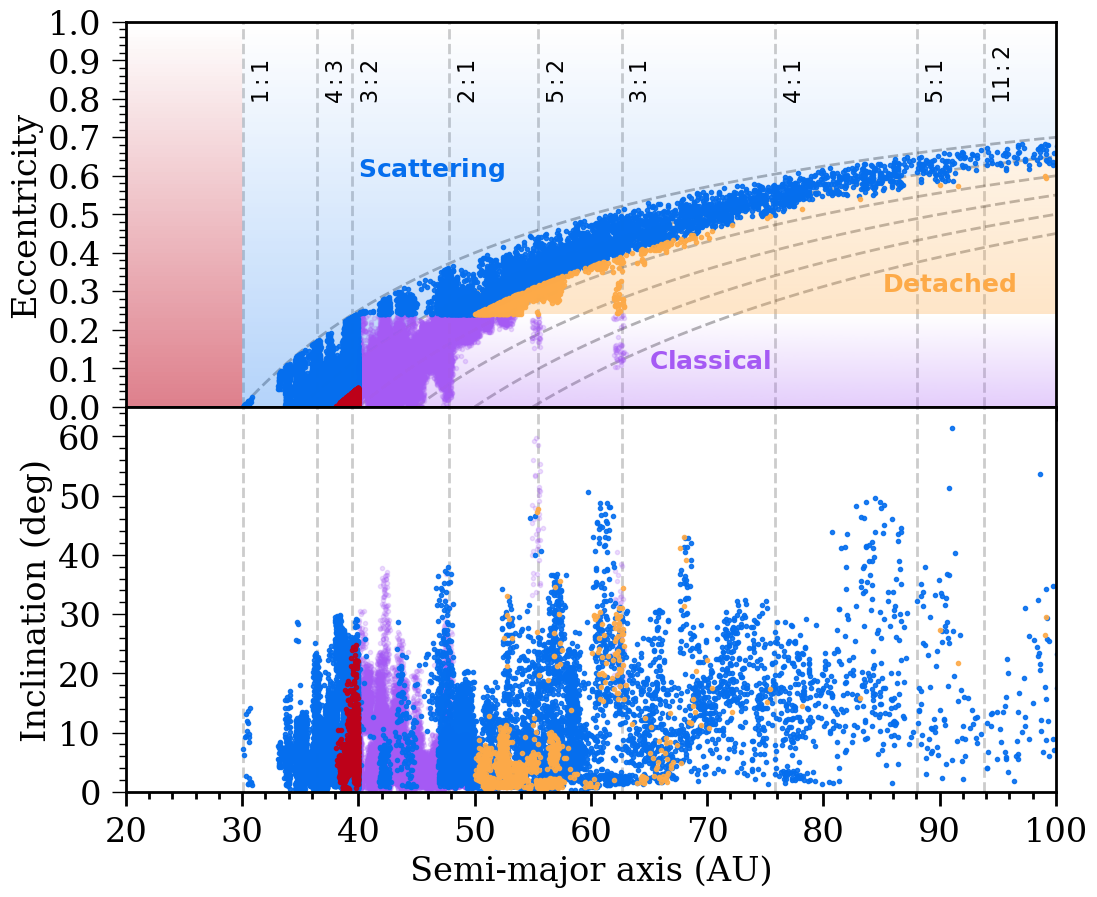

In [75]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

plt.subplots_adjust(wspace=0, hspace=0)

plt.rcParams["image.composite_image"] = False

e = np.linspace(0,0.99999,10000)

for i in [30,35, 40, 45, 50,55]:
    ax1.plot(i/(1-e), e, 'k--', alpha=0.3)
#pl.plot([47.7,1000],[0.24,0.24] )

for i,j in zip([1,2,3,3, 4,4, 5, 5, 11  ], [1,1,1,2, 1, 3, 2, 1, 2 ]):
    ax1 = plot_resonances(ax1, i, j, 0.8)
    ax2 = plot_resonances(ax2, i, j, )

gradient_fill_inv(30/(1-e), e, ax = ax1, alpha=0.3)

gradient_fill(35/(1-e)[e > 0.24], e[e>0.24], ax = ax1, alpha=0.3, color='xkcd:light orange')

scat = np.append(30/(1-e), 35/(1-e)[::-1])
scat_e = np.append(e, e[::-1])

gradient_fill(scat, scat_e, ax = ax1, alpha=0.3, color='xkcd:cerulean blue')
cl = np.append(35/(1-e)[e < 0.24], 100)
e_cl = np.append(e[e<0.24],0.24)
gradient_fill(cl, e_cl, ax = ax1, alpha=0.3, color='xkcd:lighter purple')

gradient_fill_inv(np.array([20,30,30]), np.array([0,0,1]), ax = ax1, alpha=0.5, color='xkcd:scarlet')


for c, j in zip(['Classical', 'Scattering', 'Detached', 'Extreme', '     Other'],
                ['xkcd:lighter purple', 'xkcd:cerulean blue', 'xkcd:light orange', 'xkcd:leaf green', 'xkcd:scarlet']):
    b = tnos[tnos['class'] == c]
    print (c, len(b))
    alp = 0.9
    if c == 'Classical':
        alp = 0.2
    ax1.plot(b['a'], b['e'], '.', alpha=alp, color=j)
    ax2.plot(b['a'], b['incl'], '.', alpha=alp, color=j)

#ax1.text(23, 0.4, r'$\bf{Centaurs}$', rotation=90, color='xkcd:scarlet', fontsize=20,)
ax1.text(40, 0.6, r'$\bf{Scattering}$', rotation=0, color='xkcd:cerulean blue', fontsize=18,)
ax1.text(85, 0.3, r'$\bf{Detached}$', rotation=0, color='xkcd:light orange', fontsize=18,)
ax1.text(65, 0.1, r'$\bf{Classical}$', rotation=0, color='xkcd:lighter purple', fontsize=18,)
#ax1.text(34, 0.3, r'$\bf{Resonances}$', rotation=90, color='xkcd:leaf green', fontsize=20,)

ax1.set_xticks([20,30,  40,  50,  60, 70,80,90,100,])
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax2.set_yticks([0,10,20,30,40,50,60,])

ax1.set_ylim(0,1)
ax2.set_xlabel('Semi-major axis (AU)')
ax1.set_ylabel('Eccentricity')
ax2.set_ylabel('Inclination (deg)')
ax2.set_ylim(0,65)
ax1.set_xlim(20,100)
ax2.set_xlim(20,100)
fig.set_size_inches(12,10)
#pl.savefig('classes_des_colored.png',dpi=600)
plt.show()

1 1 30.11
2 1 47.79664567476249
3 1 62.63132391209283
3 2 39.45526168981493
4 1 75.87244562466927
4 3 36.47566736678382
5 2 55.46309421203103
5 1 88.0421740975894
11 2 93.81793764818663
[30.        30.0030006 30.0060018 ... 35.0070021 35.0035007 35.       ] [0.         0.00010001 0.00020002 ... 0.00020002 0.00010001 0.        ]
[ 35.          35.0035007   35.0070021  ...  46.04196671  46.04802486
 150.        ] 35.0 150.0
[0.00000000e+00 1.00009991e-04 2.00019982e-04 ... 2.39823958e-01
 2.39923968e-01 2.40000000e-01] 0.0 0.24
[ 35.          35.0035007   35.0070021  ...  46.04196671  46.04802486
 150.        ]
[0.00000000e+00 1.00009991e-04 2.00019982e-04 ... 2.39823958e-01
 2.39923968e-01 2.40000000e-01]
Classical 25511
Scattering 29034
Detached 1369
Extreme 33
     Other 1211


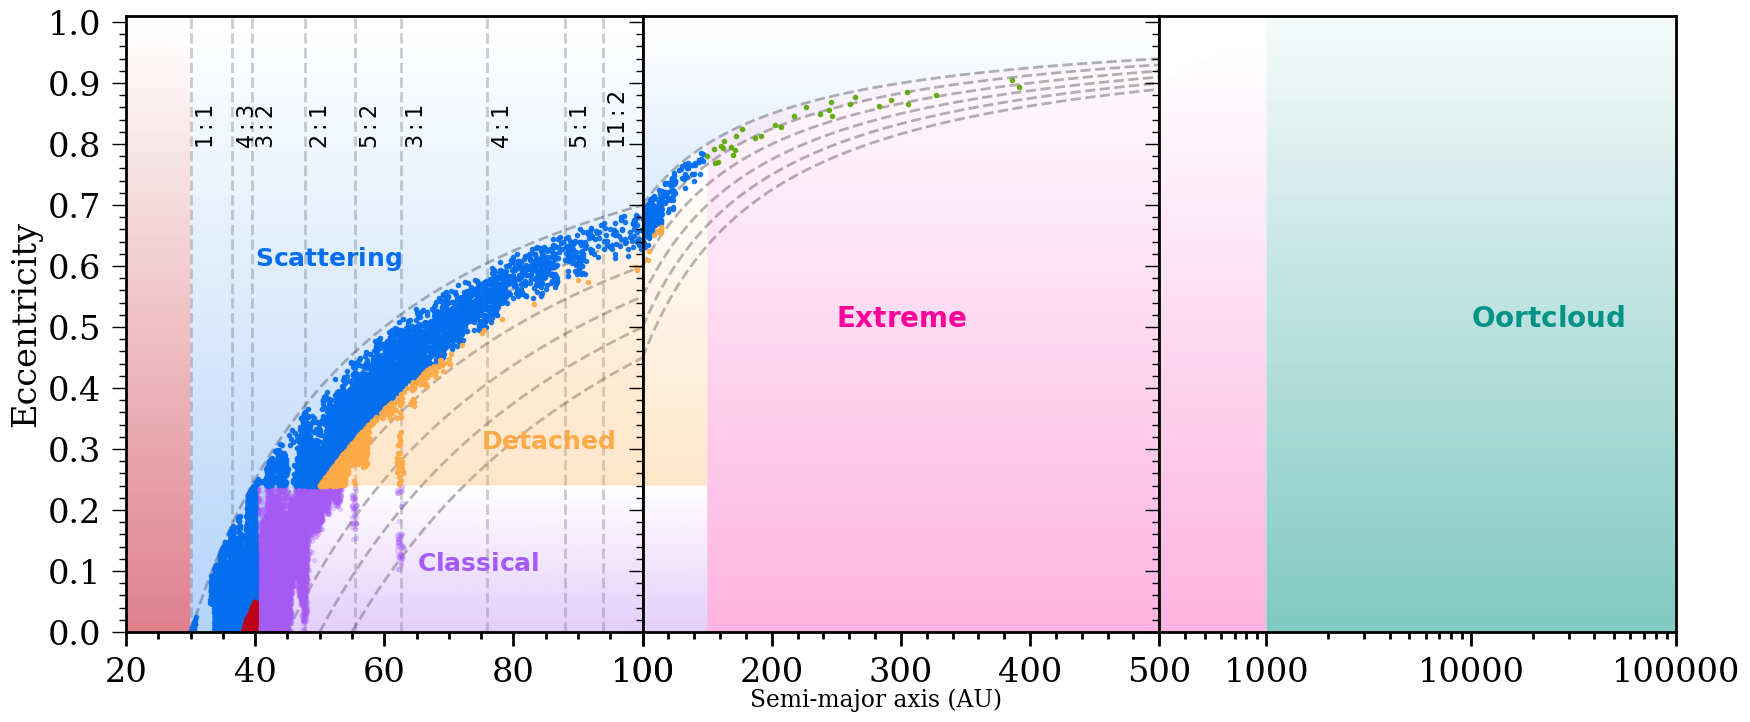

In [76]:
### fig = pl.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)

plt.rcParams["image.composite_image"] = False

e = np.linspace(0,0.9999999,10000)

for i in [30,35, 40, 45, 50,55]:
    ax1.plot(i/(1-e), e, 'k--', alpha=0.3)
    ax2.plot(i/(1-e), e, 'k--', alpha=0.3)
#pl.plot([47.7,1000],[0.24,0.24] )

for i,j in zip([1,2,3,3, 4,4, 5 ,5, 11  ], [1,1,1,2, 1, 3, 2, 1, 2 ]):
    ax1 = plot_resonances(ax1, i, j, 0.8)

gradient_fill_inv(30/(1-e), e, ax=ax1, alpha=0.3)

a_det = 35/(1-e)[e > 0.24]
e_det = e[e>0.24]
gradient_fill(35/(1-e)[e > 0.24], e[e>0.24], ax=ax1, alpha=0.3, color='xkcd:light orange')
gradient_fill(a_det[a_det<150], e_det[a_det<150], ax=ax2, alpha=0.3, color='xkcd:light orange')
scat = np.append(30/(1-e), 35/(1-e)[::-1])
scat_e = np.append(e, e[::-1])

print (scat, scat_e)

gradient_fill(scat, scat_e, ax=ax1, alpha=0.3, color='xkcd:cerulean blue')
gradient_fill(scat, scat_e, ax=ax2, alpha=0.3, color='xkcd:cerulean blue')
gradient_fill_inv(30/(1-e), e, ax=ax2, alpha=0.5, color='xkcd:cerulean blue')


cl = np.append(35/(1-e)[e < 0.24], 150)
msk = cl<151
e_cl = np.append(e[e<0.24],0.24)

print (cl, np.min(cl), np.max(cl))
print (e_cl, np.min(e_cl), np.max(e_cl))

gradient_fill(cl, e_cl, ax=ax1, alpha=0.3, color='xkcd:lighter purple')

print (cl[msk]) #, np.min(cl), np.max(cl))
print (e_cl[msk]) #, np.min(e_cl), np.max(e_cl))

gradient_fill(cl[msk], e_cl[msk], ax=ax2, alpha=0.3, color='xkcd:lighter purple')

cl = np.append(35/(1-e)[e < 0.24], 150)
e_cl = np.append(e[e<0.24],0.24)


## gradient_fill(cl, e_cl, ax=ax3, alpha=0.3, color='xkcd:lighter purple')

gradient_fill_inv(np.array([20,30,30]), np.array([0,0,1]), ax=ax1, alpha=0.5, color='xkcd:scarlet')

a = 30/(1-e)
gradient_fill(np.append(150,a[a>150]), np.append(0,e[a>150]), ax=ax2, alpha=0.3, color='xkcd:neon pink')
gradient_fill(np.append(150,a[a<1000]), np.append(0,e[a<1000]), ax=ax3, alpha=0.3, color='xkcd:neon pink')

for c, j in zip(['Classical', 'Scattering', 'Detached', 'Extreme', '     Other'],
                ['xkcd:lighter purple', 'xkcd:cerulean blue', 'xkcd:light orange', 'xkcd:leaf green', 'xkcd:scarlet']):
    b = tnos[tnos['class'] == c]
    print (c, len(b))
    alp = 0.9
    if c == 'Classical':
        alp = 0.2
    ax1.plot(b['a'], b['e'], '.', alpha=alp, color=j)
    ax2.plot(b['a'], b['e'], '.', alpha=alp, color=j)

#ax1.text(23, 0.4, r'$\bf{Centaurs}$', rotation=90, color='xkcd:scarlet', fontsize=20,)
ax1.text(40, 0.6, r'$\bf{Scattering}$', rotation=0, color='xkcd:cerulean blue', fontsize=18,)
ax1.text(75, 0.3, r'$\bf{Detached}$', rotation=0, color='xkcd:light orange', fontsize=18,)
ax1.text(65, 0.1, r'$\bf{Classical}$', rotation=0, color='xkcd:lighter purple', fontsize=18,)
ax2.text(250, 0.5, r'$\bf{Extreme}$', rotation=0, color='xkcd:neon pink', fontsize=20,)
ax3.text(10000, 0.5, r'$\bf{Oort cloud}$', rotation=0, color='xkcd:teal', fontsize=20,)
    
ax1.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax1.set_ylim(0,1.01)
fig.supxlabel('Semi-major axis (AU)')
ax1.set_ylabel('Eccentricity')
ax1.set_xlim(20,100)
ax2.set_xlim(100,500)
ax3.set_xlim(300,100000)
ax3.set_xscale('log')
gradient_fill_inv(np.array([1000,300000,300000]), np.array([0,0,1.1]), ax = ax3, alpha=0.5, color='xkcd:teal')

ax3.set_xticks([1000, 10000, 100000], labels=['1000', '10000', '100000'])
fig.set_size_inches(20,8)
#pl.savefig('classes_des_oort.png',dpi=600)
plt.show()

### 

## Using Orbital Elements to construct and visualize orbits 

We can use the orbital elements from the TNOs to visualize their orbits (including comets). We can identify patterns in orbits of different dynamical classes, for example, the clustering of extreme objects that some researchers argue is evidence in favor of the existence of P9/PX. 

## Define functions first 

In [50]:
def q_func(E, a, e):
    """
    Computes the coordinate vector q = (a * (cos(E) - e),
    a * sqrt(1 - e^2) * sin(E), 0),
    on the plane of the ellipse.
    """
    q1 = a * (np.cos(E) - e)
    q2 = a * np.sqrt(1. - e ** 2) * np.sin(E)

    if isinstance(q1, float):
        return np.array([q1, q2, 0.])
    else:
        return np.array([q1, q2, np.zeros_like(q1)])


def R(omega, Omega, i):
    """
    Computes the rotation matrix R = R(Omega, omega, i) that
    maps from the plane of the ellipse to 3D space aligned
    with the ecliptic plane.
    """
    cO = np.cos(np.pi * Omega / 180)
    sO = np.sin(np.pi * Omega / 180)
    co = np.cos(np.pi * omega / 180)
    so = np.sin(np.pi * omega / 180)
    ci = np.cos(np.pi * i / 180)
    si = np.sin(np.pi * i / 180)

    R = np.array([[cO * co - sO * so * ci, -cO * so - sO * co * ci, sO * si],
                  [sO * co + cO * so * ci, -sO * so + cO * co * ci, -cO * si],
                  [si * so, si * co, ci]])

    return R


def full_ellipse(a, e, i, Omega, omega):
    """
    Computes the coordinates of the full ellipse in 3D space.
    """
    E = np.linspace(0, 2 * np.pi, 2000)
    q_vec = q_func(E, a, e)
    Rot = R(omega, Omega, i)
    x = np.einsum('ij, j...', Rot, q_vec)

    return x

In [48]:
x = []
# node = Omega; peri = omega
for i in tnos:
    x.append(full_ellipse(i['a'], i['e'], i['incl'], i['node'], i['peri']))
tnos['vec'] = x

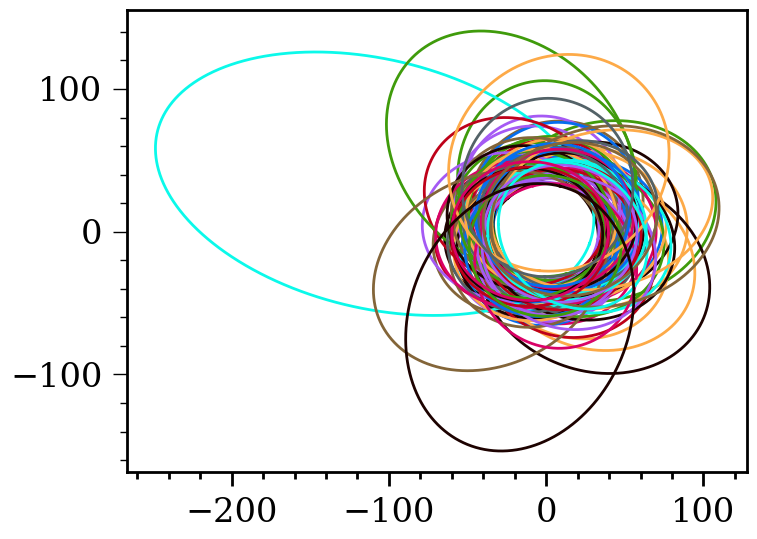

In [44]:
for i in tnos[:100]:
    plt.plot(i['vec'][:,0], i['vec'][:,1])

In [45]:
len(tnos), len(tnos[(tnos['a'] > 150) & (tnos['q'] > 30)])

(36007, 14)

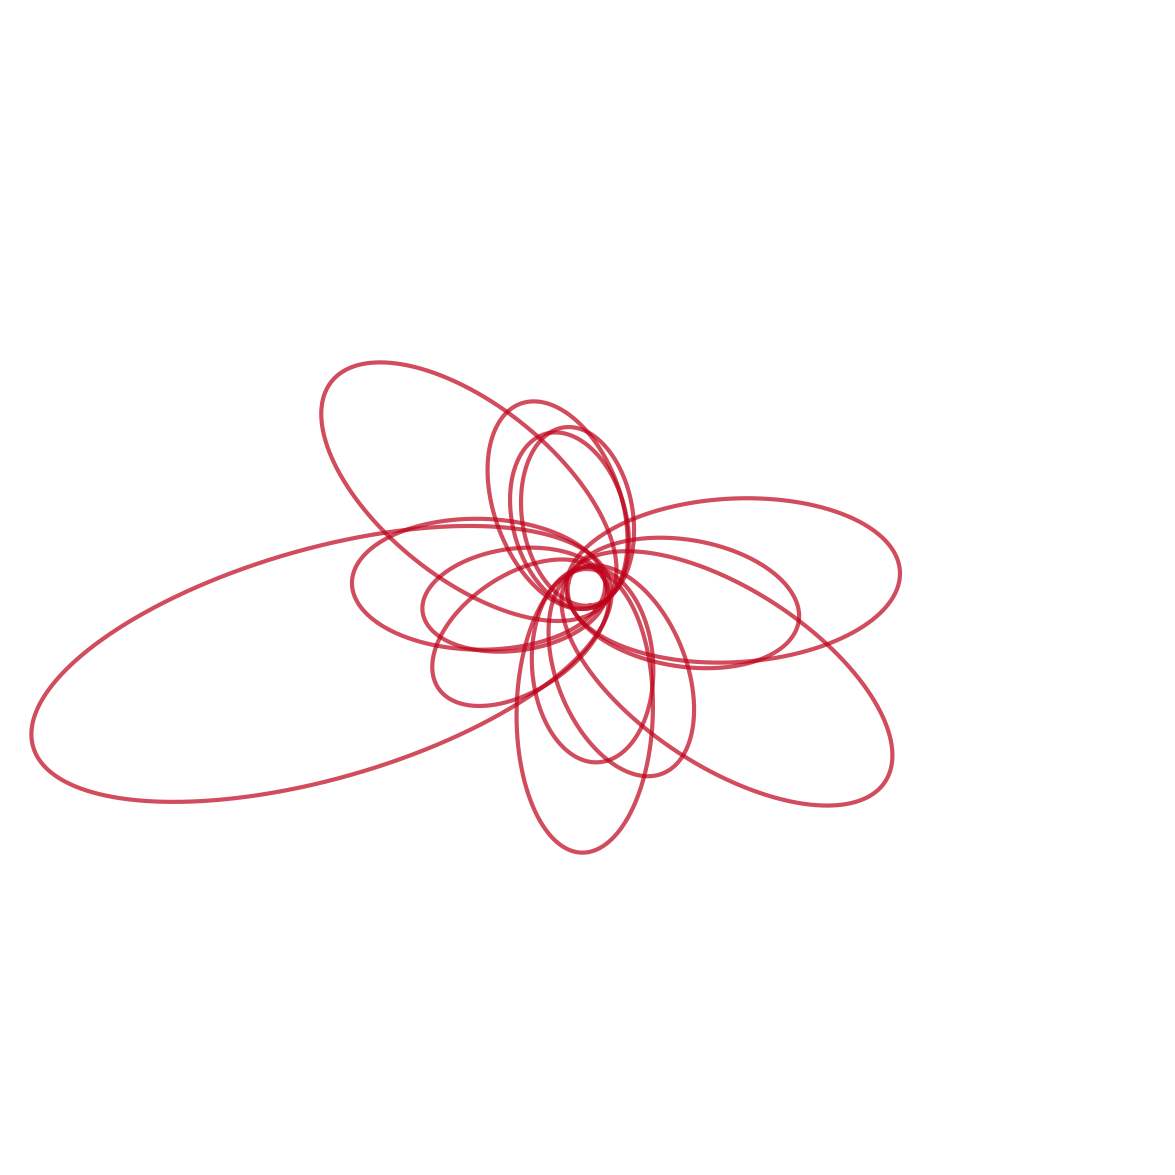

In [46]:
fig = plt.figure()
fig.set_size_inches(15,15)
plt.rcParams['figure.facecolor'] = 'black'

plt.axes().set_aspect('equal')


colors = {'Resonant' : '#9ed4bf', 'Classical' : '#9ed4bf', 'Scattering': '#9ed4bf',
          'Detached' : '#9ed4bf', 'Oort cloud' : '#9ed4bf', 'Inner Centaur' : '#9ed4bf'}
alphas = {'Resonant' : 0.1, 'Classical' : 0.1, 'Scattering' : 0.1, 'Detached': 0.1, 'Inner Centaur' : 0.1, 'Oort cloud' : 0.1}
alphas_dist = {'Resonant' : 0.2, 'Classical' : 0.2, 'Scattering' : 0.2, 'Detached': 0.2, 'Inner Centaur' : 0.2, 'Oort cloud' :0.2}



tnos.sort('a')
#for i in reversed(tnos):
    
#    if i['a'] < 100:
#        pl.plot(i['vec'][:,0], i['vec'][:,1], colors[i['class']], alpha=alphas[i['class']], linewidth=3)
#    else:
#        pl.plot(i['vec'][:,0], i['vec'][:,1], colors[i['class']], alpha=alphas_dist[i['class']], linewidth=3)
#pl.plot(xx[:,0], xx[:,1],  'xkcd:scarlet', alpha=1)

for i in tnos[(tnos['a'] > 150) & (tnos['q'] > 30)]:
    plt.plot(i['vec'][:,0], i['vec'][:,1], 'xkcd:scarlet', linewidth=3, alpha=0.7)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)


plt.axis('off')


#pl.savefig('all_p9.png', dpi = 300)
plt.show()

In [ ]:
# From Pedro: "This is expected, and it also says a lot about expected results from LSST!
#The S3M model predates the whole Planet 9 stuff (and is old enough that these more exotic populations are not representative of what we have learned from the more recent surveys)
#But this does an excellent job of showing that LSST will see the signal or not easily!"

In [ ]:
fig = plt.figure()
fig.set_size_inches(15,15)
plt.rcParams['figure.facecolor'] = 'black'

plt.axes().set_aspect('equal')


colors = {'Resonant' : '#9ed4bf', 'Classical' : '#9ed4bf', 'Scattering': '#9ed4bf',
          'Detached' : '#9ed4bf', 'Oort cloud' : '#9ed4bf', 'Inner Centaur' : '#9ed4bf'}
alphas = {'Resonant' : 0.1, 'Classical' : 0.1, 'Scattering' : 0.1, 'Detached': 0.1, 'Inner Centaur' : 0.1, 'Oort cloud' : 0.1}
alphas_dist = {'Resonant' : 0.2, 'Classical' : 0.2, 'Scattering' : 0.2, 'Detached': 0.2, 'Inner Centaur' : 0.2, 'Oort cloud' :0.2}



tnos.sort('a')
for i in reversed(tnos):
    
    if i['a'] < 100:
        #pl.plot(i['vec'][:,0], i['vec'][:,1], colors[i['class']], alpha=alphas[i['class']], linewidth=3)
        plt.plot(i['vec'][:,0], i['vec'][:,1], '#9ed4bf' , alpha=0.1, linewidth=3)
    else:
        #pl.plot(i['vec'][:,0], i['vec'][:,1], colors[i['class']], alpha=alphas_dist[i['class']], linewidth=3)
        plt.plot(i['vec'][:,0], i['vec'][:,1], '#9ed4bf', 0.2, linewidth=3)

for i in tnos[(tnos['a'] > 150) & (tnos['q'] > 30)]:
    plt.plot(i['vec'][:,0], i['vec'][:,1], 'xkcd:scarlet', linewidth=3, alpha=0.7)
plt.xlim(-1000,1000)
plt.ylim(-1000,1000)


plt.axis('off')


#pl.savefig('all_p9.png', dpi = 300)
plt.show()